# THE SPARK FOUNDATION<br>
## Data Science and Business Analytics Internship

#### By: Valerie Fernandes

#### Task 3 : Exploratory Data Analysis- Retail<br>
### objective:
To find out the weak areas where you can work to make more profit as a business manager, also finding out the business problem exploring the data.


### Importing libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [74]:
#set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

### Read file

In [75]:
data_super=pd.read_csv(r"SampleSuperstore.csv")
data_super.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [76]:
data_super.shape

(9994, 13)

### Exploratory data analysis

In [77]:
data_super.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [78]:
data_super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### For numeric vairables

In [79]:
#discribe() returns the statistical summary of the variables
#by default it returns the summary if numerical variables
#We transpose the result for better readability
data_super.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


#### For categorical variable

In [80]:
#summary if the categorical variables
data_super.describe(include='object').transpose()
#Note: if we pass 'include =object' to the .describe() function returns descriptive statistics for categorical variables only


,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


#### Distribution of numeric independent variables.

For the independent variables, we plot the histogram to check the distribution of the variables.

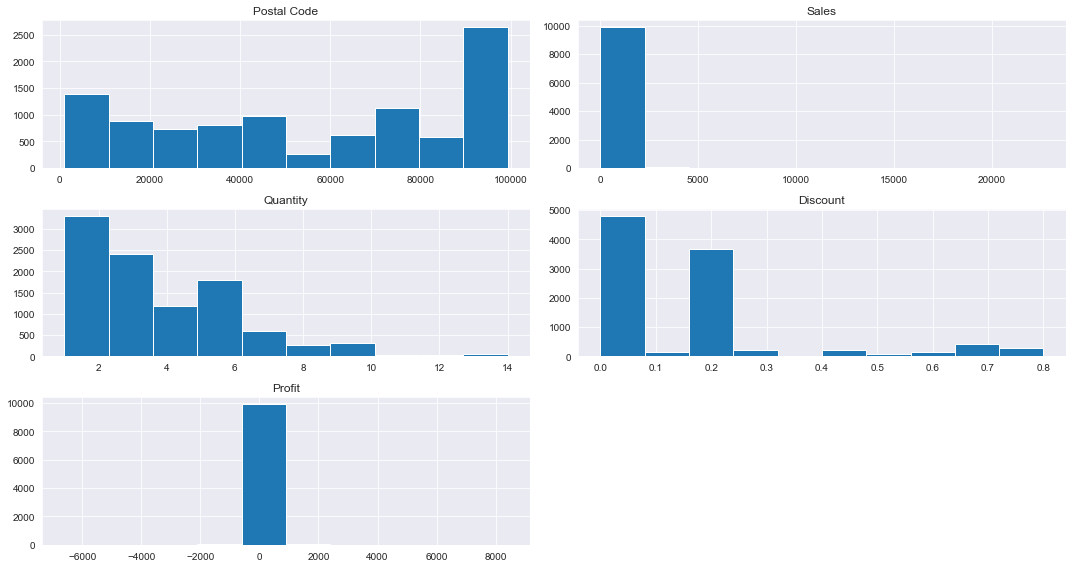

In [81]:
#plot the histogram of numeric independent variables
#hist() function considers the numeric variables only, by default
data_super.hist()

#adjust the subplot
plt.tight_layout()

#display the subplot
plt.show()

#### Distribution of categorical independent variables.
For the independent categorical variables, we plot the the barplot to check the distribution of each variables.

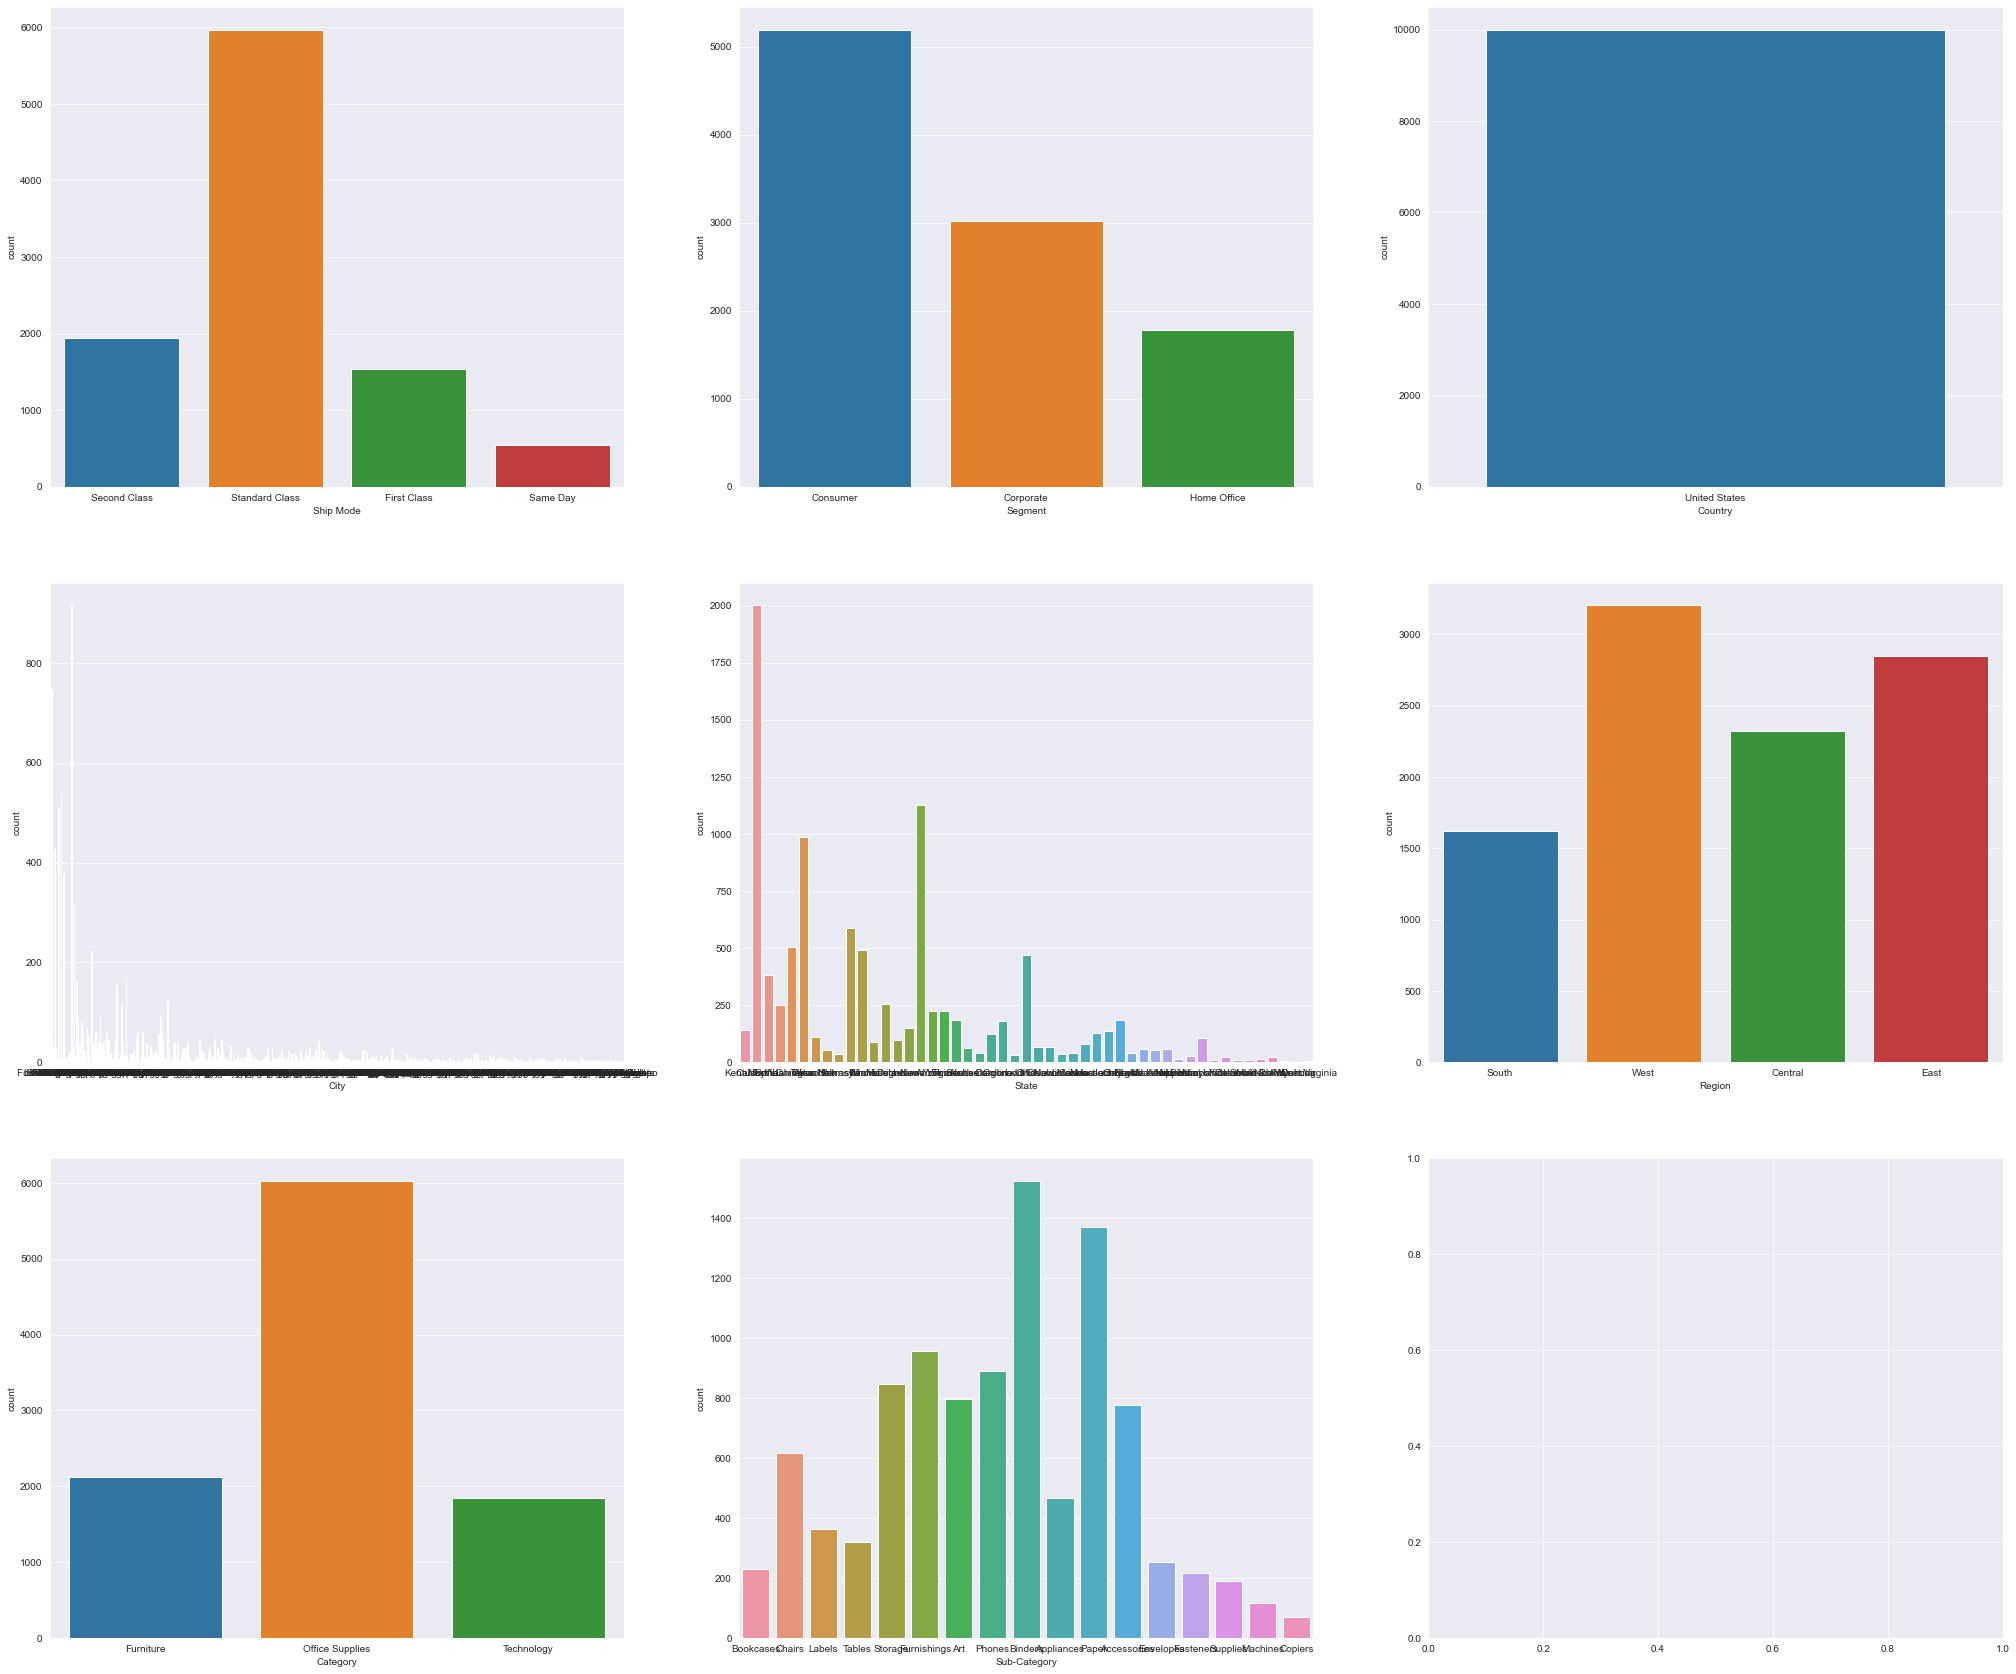

In [82]:
# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

#create a list of all categorical variables
#intiate an empty list to store the categorical variable
categorical=[]
#for loop to check data type of each variable

for column in data_super:
    
    #use 'if' statement with condition to check the categorical type
    if is_string_dtype(data_super[column]):
        
        #append tge variables with 'cotegoric' data type in the list  'categorical'
        categorical.append(column)

#plot the count plot for each categorical variables
#set the number of rows in the subplot using the parameter, 'nrows'
#set the number of columns in the subplot using the parameter, 'ncols'
#'figsize' sets the figure size
fig,ax=plt.subplots(nrows=3,ncols=3, figsize=(35,30))

#use the loop to plot the count plot for each variables
for variable, subplot in zip(categorical, ax.flatten()):
    
    #use countplot() to plot the graph
    #pass the axes foor the plot to the parameter, 'ax'
    sns.countplot(data_super[variable], ax=subplot)
    
#display the plot
plt.show()
        

#### We can see in the above plot the few states have high sales based on discount but less profit, we clearly see the region that have highly sales in 'west' and 'east'.

#### Visualize the frequency distribution

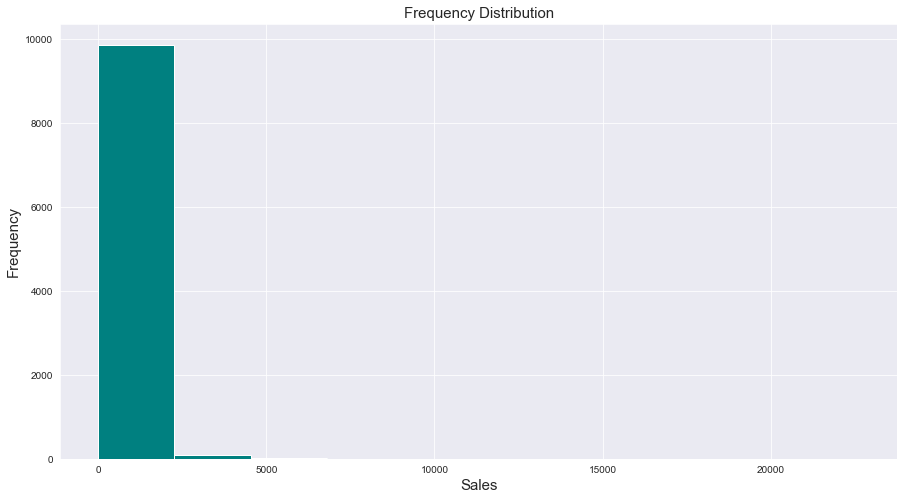

In [83]:
#Set the xlabel and the fontsize
plt.xlabel("Sales",fontsize=15)

#set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

#set the title of the plot
plt.title("Frequency Distribution", fontsize=15)

#plot the histogra for the target variables
plt.hist(data_super["Sales"],color="teal")
plt.show()

#### Draw the pairplot of the numeric column

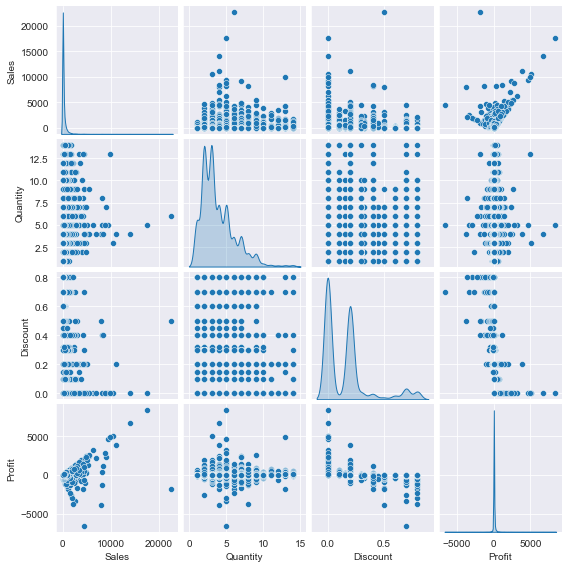

In [84]:
#pairplot of numeric variables
#select the columns for the pairplot

columns=["Sales","Quantity", "Discount", "Profit"]

#draw the pairplot such that the diagonal should be density plot and graphs should be scatter plot
sns.pairplot(data_super[columns],size=2,kind="scatter", diag_kind="kde")

#display the plot
plt.show()

Seeing the graph, we can say that there is a positive growth between Profit and Sales when No Discount were given.

From the graph, we can say that as Discount increases, the Sales also increases but Profit decreases.<br>
In above plot we cansee how increase in Discount is affecting Profit in different categories.

#### Outliers Discovery

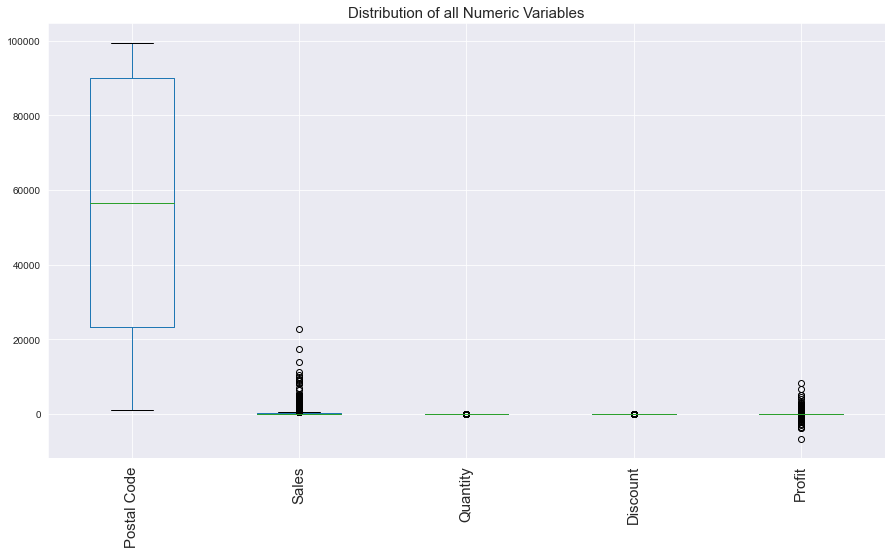

In [85]:
# plot a boxplot to visualize the outliers in all the numeric variables
data_super.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

From the above plot we can see that there are outliers present in the target variable 'Sales'. Outliers badly affect the prediction of the regression model and thus, we will remove these outliers.

In [86]:
# remove the observations with the house price greater than or equal to 500000
data_super = data_super[data_super['Sales'] < 10000]

# check the dimension of the data
data_super.shape

(9989, 13)

#### Missing values

In [87]:
data_super.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

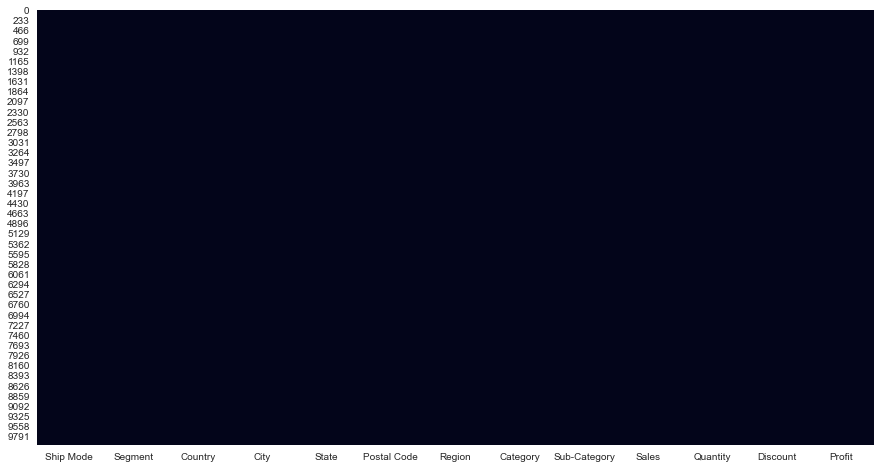

In [88]:
#plot heatmap to check null values
#'cbar=False' does not know the color axis
sns.heatmap(data_super.isnull(),cbar=False)
#display the plot
plt.show()

There are no horizontal lines in the heatmap which would correspond to a probable missing values.

#### Correlation


In [89]:
#use the function corr() function to generate the correlation matrix of the numeical variables
corrmat=data_super.corr()

corrmat

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023295,0.012810,0.058622,-0.034198
Sales,-0.023295,1.000000,0.236455,-0.035653,0.401382
Quantity,0.012810,0.236455,1.000000,0.008479,0.077595
Discount,0.058622,-0.035653,0.008479,1.000000,-0.251547
Profit,-0.034198,0.401382,0.077595,-0.251547,1.000000


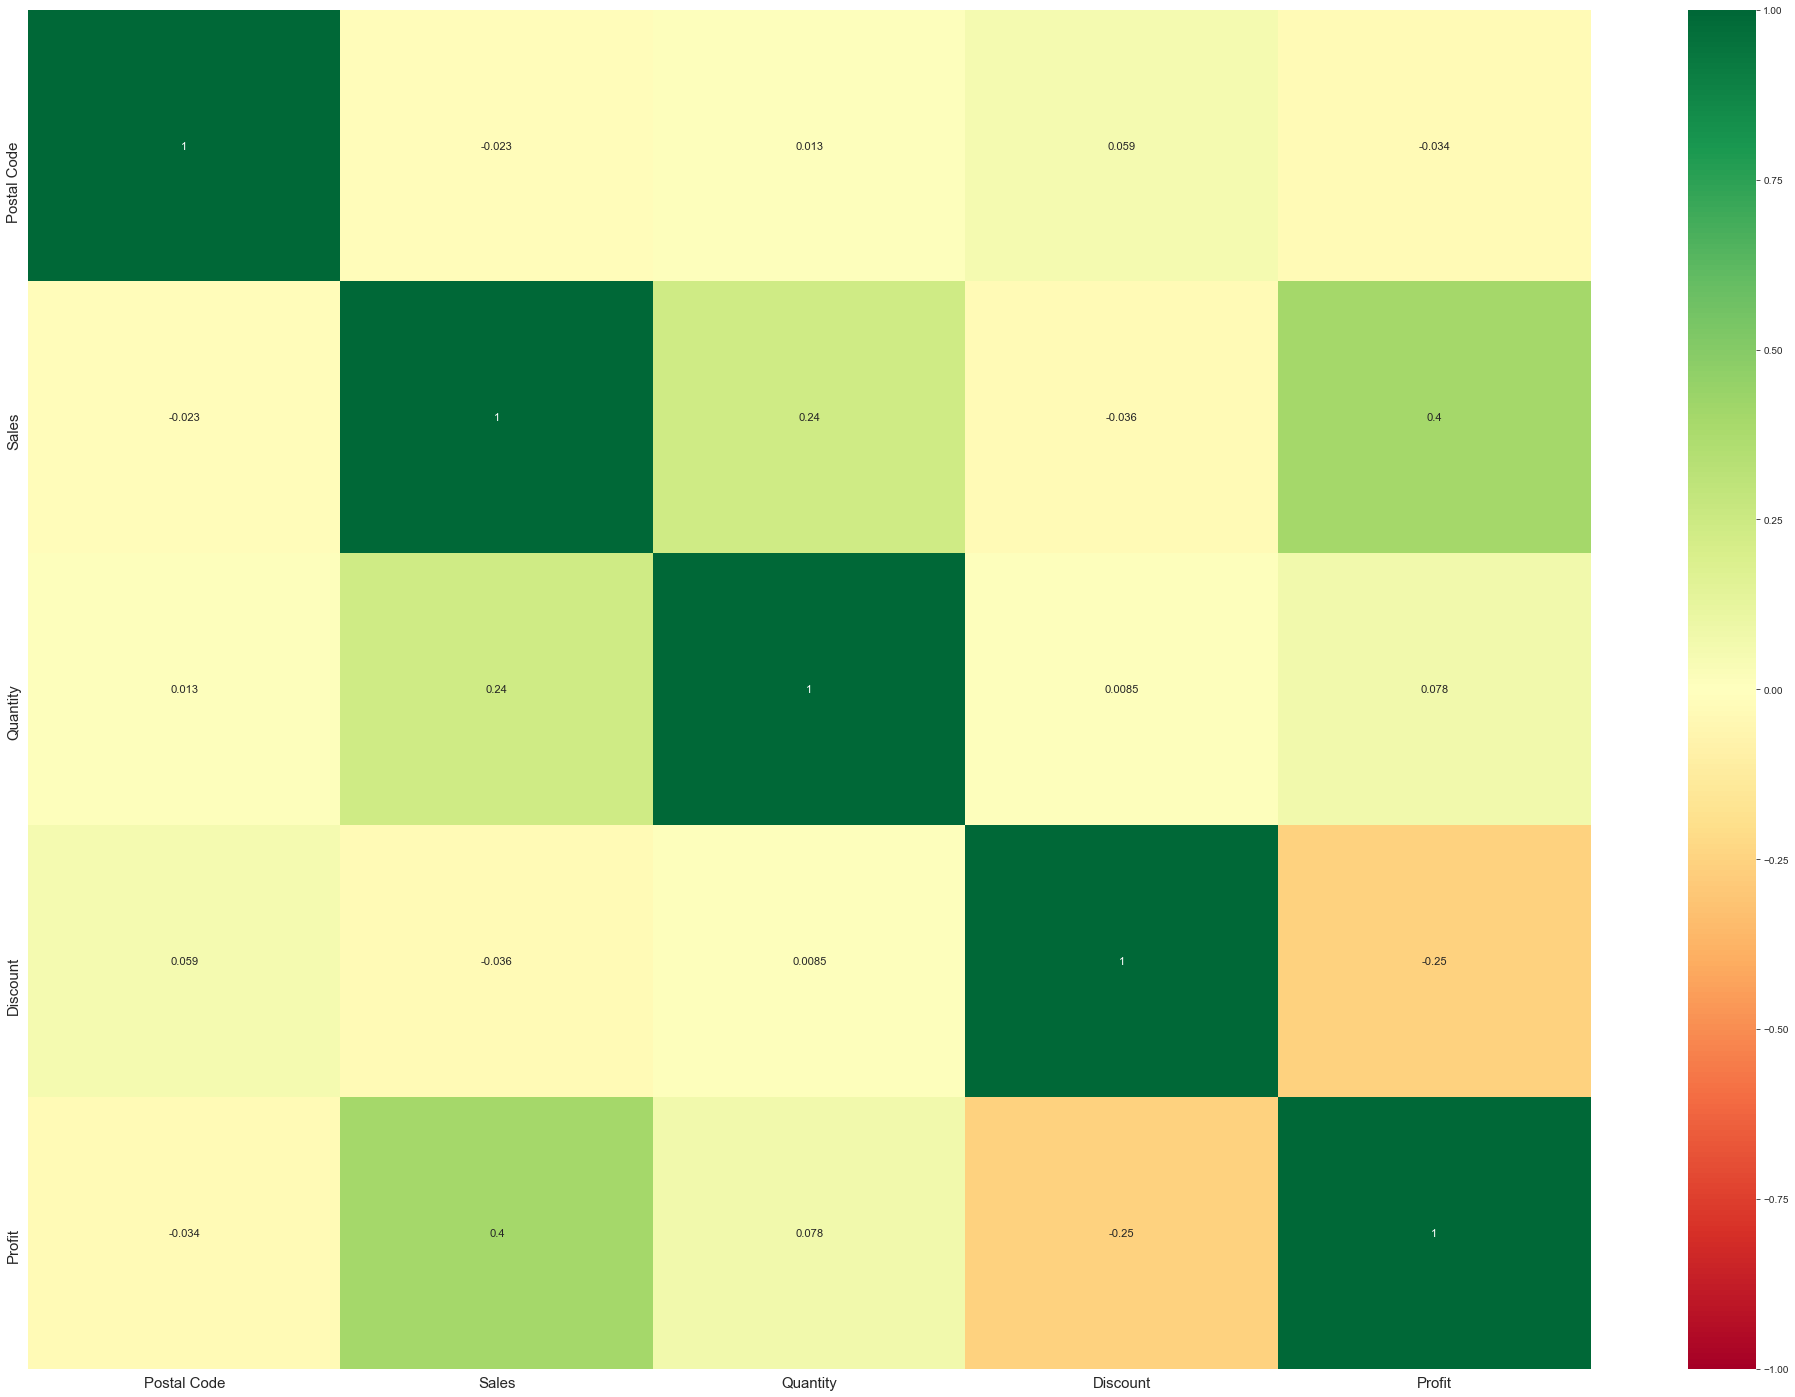

In [90]:
#Plotting the heatmap for correlation
plt.figure(figsize=(35,25))

#plot the heat map
#corr: give the carrelation matrix
#cmap: color code used for plotting
#annot_kws: sets the font size of the annotation
#annot: prints the correlation values in the chart
#vmax: gives a maximum range of the values for the chart 
#vmin: gives a minimum range of values for the chart
sns.heatmap(corrmat, annot=True, vmax=1.0, vmin=-1.0, cmap='RdYlGn', annot_kws={"size":11.2})

#set the size of x and y axes labels using fontsize
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#display the plot
plt.show()

Text(0.5, 1.0, 'Total profit')

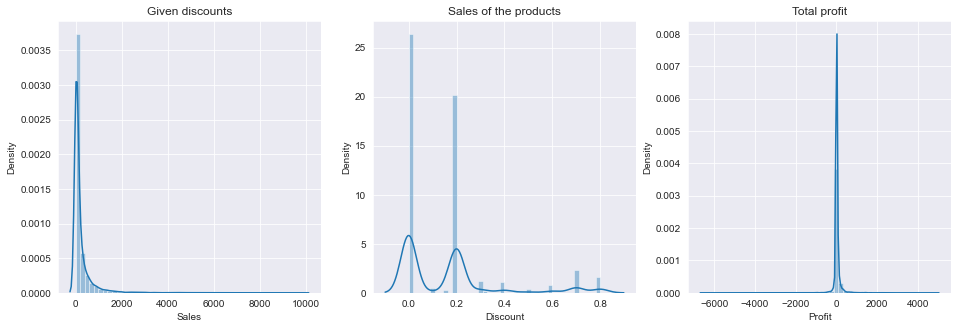

In [91]:
#checking out the continuous variable ploting density plots thats used to observe the distribution of a variable in a dataset.
#It plots the graph on a continuous interval or time-period, An advantage of Density Plots over Histograms 
#is that they're better at determining the distribution shape because they're not affected by the number of bins
fig, ax = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(data_super['Sales'],ax=ax[0])
sns.distplot(data_super['Discount'], ax=ax[1])
sns.distplot(data_super['Profit'], ax=ax[2])

ax[1].set_title("Sales of the products")
ax[0].set_title("Given discounts")
ax[2].set_title("Total profit")

#### Profit distribution by Region

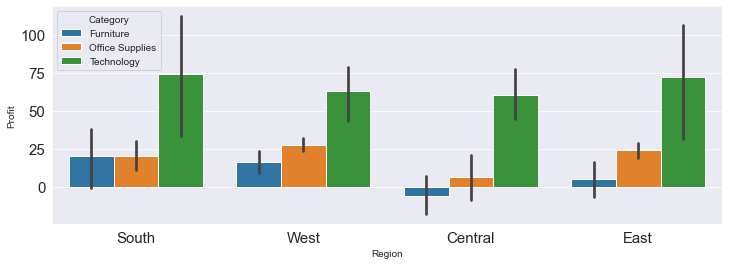

In [93]:
plt.figure(figsize = (12,4))
sns.barplot(x = "Region",y = "Profit" ,hue = "Category", data=data_super)
plt.tick_params(labelsize=15)
plt.show()

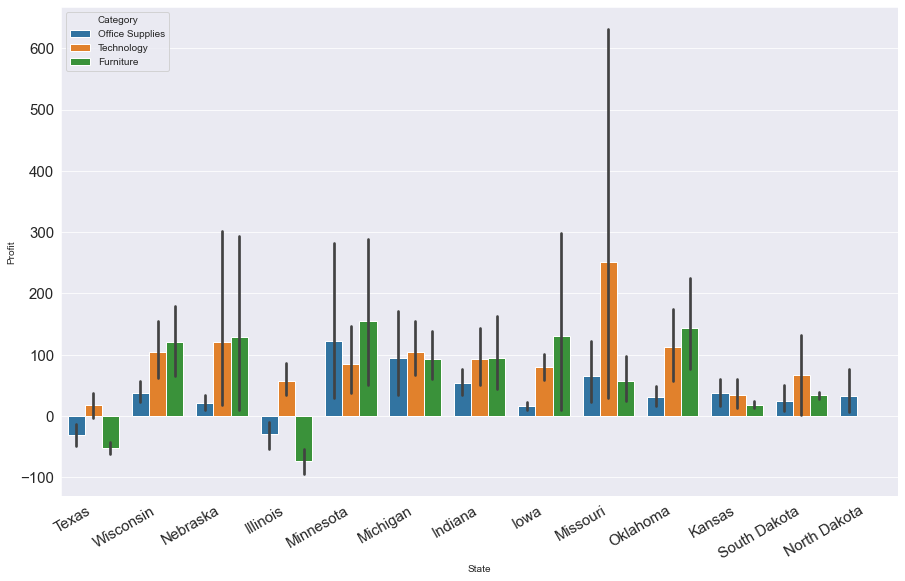

In [94]:
central_region = data_super[data_super['Region']=='Central']
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Profit" ,hue = "Category", data=central_region)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

'Texas' and 'Illinois' are the only two loss making states in Central Region. They are making losses in 'Furniture' and Office Supplies' category. Let us see the reason behind the losses in these two states.

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Discount" ,hue = "Sub-Category", data= central_region)
plt.title("Discounts provided by each state", fontsize = 20)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

As we can see 'Texas' and 'Illinois' are the only two states that are providing discounts in the entire Central region.

Also the Discounts are very high!

### Are these Discounts driving Sales Up? Let us find out about that.

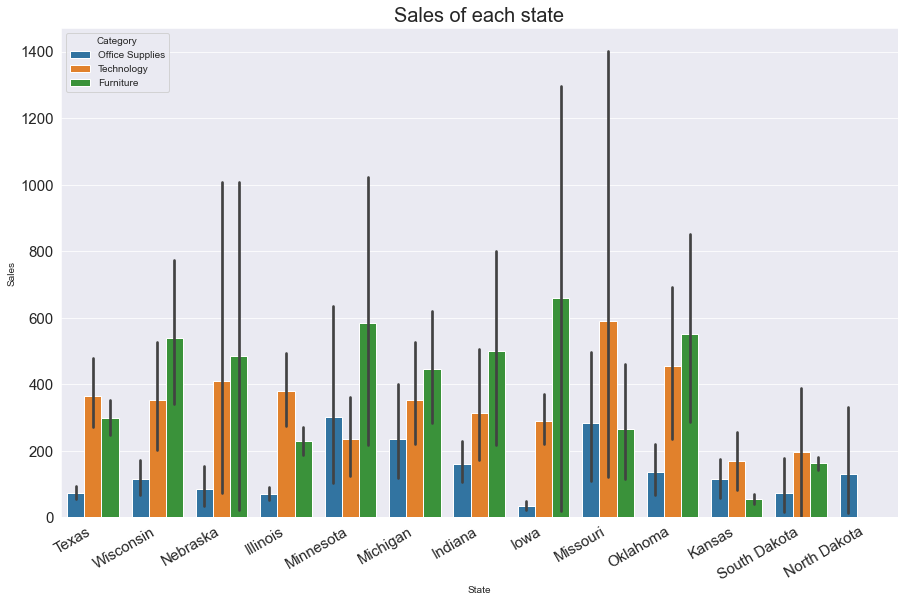

In [95]:
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Sales" ,hue = "Category", data= central_region)
plt.title("Sales of each state", fontsize = 20)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

Thus, our answer to the previous question is NO! Although huge discounts are given, the sales of the two states('Texas' and 'Illinois') are relatively very low

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------
## Conclusion
#### The Sales of product increases when Discount is given, but Profit goes down.California and New York are the ahead of others in terms of sales and profit. Hence we should focus selling more products in those states.

#### ‘Technology’ category has more profit than ‘Furniture’ and ‘Office Supplies’. Whereas, Office Supplies has lowest sales and profit, so we need to focus on this category more.

#### Furniture Category is in loss as profit is lowest although its sales is high.

#### Sales of ‘Fasteners’, ‘Labels’ and ‘Art’ is very low. Hence, we need to focus in increasing its sales.

#### Central region is the only region with negative profit in ‘Furniture’ and ‘Office Supplies’ category. This is due to high discount given by the Texas and Illinois state having very low sales rate.

#### Hence, to get good profit in any business we have to focus on increasing sales but not giving more discount. And also we have to increase sales in highest profit making areas.